## IOWA LIQUER SALES ANALYSIS

I have obtained the Iowa Liquor Sales (ILS) Data Set from the official website (https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/data_preview). This project analyzes the Iowa Liquor Sales dataset to explore sales trends, customer behavior, and financial insights across the state. The tasks involve data cleaning, feature engineering, exploratory analysis, and predictive modeling using regression, classification, and clustering techniques. Visualizations and statistical methods are leveraged to uncover patterns and validate external reports. The goal is to derive meaningful insights and build machine learning models for effective decision-making.

In [2]:
import pandas as pd
ils = pd.read_csv("Iowa_Liquor_Sales.csv")

/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_2514/3244332657.py:2: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ils = pd.read_csv("Iowa_Liquor_Sales.csv")


In [3]:
ils.shape

(29881462, 24)

In [4]:
len(list(ils.columns))

24

In [5]:
ils5 = ils.sample(frac=0.05, random_state=42)
ils5.reset_index(drop=True, inplace=True)
ils5.to_csv('ils5.csv', index=False)

In [6]:
ils5.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S22365300072,11/13/2014,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442,POINT (-95.348601 42.012395),24.0,CRAWFORD,...,81966,ARROW MCDALE'S BUTTERSCOTCH SCHNAPPS,12,750,4.34,6.51,1,6.51,0.75,0.20
1,INV-53293100064,11/22/2022,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,POINT (-96.42021 42.51054),NaN,WOODBURY,...,40193,NEW AMSTERDAM PINEAPPLE,12,750,8.00,12.00,1,12.00,0.75,0.19
2,INV-50001000036,08/02/2022,2567,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.0,POINT (-90.608201 41.560663),NaN,SCOTT,...,84201,99 PINEAPPLE,12,750,7.50,11.25,6,67.50,4.50,1.18
3,S32231300157,05/10/2016,2565,HY-VEE FOOD STORE / SPENCER,819 N GRAND AVE,SPENCER,51301,POINT (-95.14506 43.145897),21.0,CLAY,...,43073,ADMIRAL NELSON SPICED 101,12,750,7.47,11.21,6,67.26,4.50,1.19
4,INV-00438700005,09/21/2016,4582,PRONTO / SPIRIT LAKE,"2402, 17TH ST",SPIRIT LAKE,51360,POINT (-95.126585 43.42282),30.0,DICKINSON,...,43026,ADMIRAL NELSON SPICED RUM,12,750,5.78,8.67,4,34.68,3.00,0.79


In [7]:
ils5.shape

(1494073, 24)

In [8]:
ils5.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [9]:
object_columns = ils5.dtypes[ils5.dtypes == 'object'].index.tolist()
other_columns = [ column for column in list(ils5.columns) if column not in object_columns]
print("Object Columns:", object_columns)
print()
print("Other Columns:", other_columns)

Object Columns: ['Invoice/Item Number', 'Date', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County', 'Category Name', 'Vendor Name', 'Item Number', 'Item Description']

Other Columns: ['Store Number', 'County Number', 'Category', 'Vendor Number', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']


In [10]:
columns = list(ils5.columns)
print(columns)

['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County', 'Category', 'Category Name', 'Vendor Number', 'Vendor Name', 'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']


In [11]:
ils5.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    4100
City                       4100
Zip Code                   4102
Store Location           125096
County Number            287376
County                     8036
Category                    796
Category Name              1190
Vendor Number                 0
Vendor Name                   0
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

In [12]:
ils5.isna().sum().sum()

434796

In [13]:
print(list(ils5.columns))

['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County', 'Category', 'Category Name', 'Vendor Number', 'Vendor Name', 'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']


In [14]:
import re
camelcase = [re.sub(r'\W+', '', x.title()) for x in list(ils5.columns)]
print(camelcase)

['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address', 'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County', 'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber', 'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters', 'VolumeSoldGallons']


In [15]:
ils5.columns = camelcase
ils5.head(2)

,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,ItemNumber,ItemDescription,Pack,BottleVolumeMl,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,S22365300072,11/13/2014,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442,POINT (-95.348601 42.012395),24.0,CRAWFORD,...,81966,ARROW MCDALE'S BUTTERSCOTCH SCHNAPPS,12,750,4.34,6.51,1,6.51,0.75,0.20
1,INV-53293100064,11/22/2022,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,POINT (-96.42021 42.51054),NaN,WOODBURY,...,40193,NEW AMSTERDAM PINEAPPLE,12,750,8.00,12.00,1,12.00,0.75,0.19


In [16]:
df = ils5.drop(columns= ["StoreLocation", "CountyNumber"])
df = ils5.apply(lambda x: x.fillna(x.mode()[0]))
df.isna().sum().sum()

0

In [17]:

from datetime import datetime
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Create new columns for year, month, and day name
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_Name'] = df['Date'].dt.day_name()
df.head(3)

,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,BottleVolumeMl,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name
0,S22365300072,2014-11-13,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442,POINT (-95.348601 42.012395),24.0,CRAWFORD,...,750,4.34,6.51,1,6.51,0.75,0.20,2014,11,Thursday
1,INV-53293100064,2022-11-22,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,POINT (-96.42021 42.51054),77.0,WOODBURY,...,750,8.00,12.00,1,12.00,0.75,0.19,2022,11,Tuesday
2,INV-50001000036,2022-08-02,2567,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.0,POINT (-90.608201 41.560663),77.0,SCOTT,...,750,7.50,11.25,6,67.50,4.50,1.18,2022,8,Tuesday


The original Iowa Liquor dataset was very large, with dimensions of (29,881,462, 24). For computational efficiency, a 5% sample was taken, resulting in a more manageable size of (1,494,073, 24). Upon inspecting the data types of the 24 columns, most columns had the correct data types. Some columns columns did have wrong data types. For example, the 'Date' column, which should have a DateTime object label, was labeled as an 'object' data type. Additionally, columns like 'Item Number,' despite having 'Number' in the name, should be treated as objects. Other columns, such as 'Store Number,' 'County Number,' and 'Vendor Number,'  are numbers in the data set, but they should not be in numerical forms. Many of these columns with inconsistent data types won't be helpful for the numerical calculation, and I will eventually drop them, so I only changed the data type of the Date column to date time. 

I also used the regex package to remove  the non alpha numeric characters and the spaces in the column names,  before changing the column names into calel case format. The sampled dataset has a total of 434,796 missing values. I filled these missing values of most of the columns with missing values using the mode of the corresponding variable. The column 'Store Location' is missing  125,096 entries, and 'County Number' is missing 287,376 entries. These are significant numbers of missing values in the sampled data set we had. Considering redundancy with existing information like county names, addresses, and zip codes, these columns were removed instead of imputing missing values. 

I changed the 'Date' column into a DateTime format and added columns for 'Year,' 'Month,' and 'Day_Name' (representing the day of the week). After completing this comprehensive data processing, the resulting dataset was named 'df.'

In [18]:
print(list(set(df.County)))
print()
print("Number of Counties:", len(list(set(df.County))))

['TAYLOR', 'WINNESHIEK', 'TAMA', 'FRANKLIN', 'DELAWARE', 'CHEROKEE', 'MILLS', 'JONES', 'IOWA', 'AUDUBON', 'JEFFERSON', 'ADAMS', 'MONTGOMERY', 'BUTLER', 'HAMILTON', 'BLACK HAWK', 'BUENA VISTA', 'HANCOCK', 'POWESHIEK', 'CLINTON', 'WOODBURY', 'MITCHELL', 'FLOYD', 'WORTH', 'CLAYTON', 'KEOKUK', 'CALHOUN', 'FAYETTE', 'BENTON', 'LEE', 'HOWARD', 'UNION', 'ADAIR', 'OSCEOLA', 'HENRY', 'JACKSON', 'MAHASKA', 'SHELBY', 'WINNEBAGO', 'BOONE', 'LINN', 'WAYNE', 'WARREN', 'IDA', 'CEDAR', 'MUSCATINE', 'BREMER', 'CARROLL', 'MONROE', 'PLYMOUTH', 'LYON', 'CRAWFORD', 'WAPELLO', 'POCAHONTAS', 'STORY', 'SIOUX', 'MARSHALL', 'EMMET', 'WASHINGTON', 'BUCHANAN', 'LUCAS', 'DUBUQUE', 'GUTHRIE', 'GREENE', 'HARRISON', 'SCOTT', 'WRIGHT', 'JOHNSON', 'KOSSUTH', 'DAVIS', 'DALLAS', 'GRUNDY', 'FREMONT', 'CLAY', 'HUMBOLDT', 'VAN BUREN', 'DES MOINES', 'MONONA', 'MADISON', 'CASS', 'POTTAWATTAMIE', 'HARDIN', 'APPANOOSE', 'JASPER', 'POLK', 'PAGE', 'WEBSTER', 'MARION', 'SAC', 'DECATUR', 'RINGGOLD', 'LOUISA', 'CERRO GORDO', 'CHICKA

In [19]:
df.columns

Index(['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address',
       'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber',
       'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons', 'Year', 'Month', 'Day_Name'],
      dtype='object')

In [20]:
df.head()

,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,BottleVolumeMl,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name
0,S22365300072,2014-11-13,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442,POINT (-95.348601 42.012395),24.0,CRAWFORD,...,750,4.34,6.51,1,6.51,0.75,0.20,2014,11,Thursday
1,INV-53293100064,2022-11-22,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,POINT (-96.42021 42.51054),77.0,WOODBURY,...,750,8.00,12.00,1,12.00,0.75,0.19,2022,11,Tuesday
2,INV-50001000036,2022-08-02,2567,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.0,POINT (-90.608201 41.560663),77.0,SCOTT,...,750,7.50,11.25,6,67.50,4.50,1.18,2022,8,Tuesday
3,S32231300157,2016-05-10,2565,HY-VEE FOOD STORE / SPENCER,819 N GRAND AVE,SPENCER,51301,POINT (-95.14506 43.145897),21.0,CLAY,...,750,7.47,11.21,6,67.26,4.50,1.19,2016,5,Tuesday
4,INV-00438700005,2016-09-21,4582,PRONTO / SPIRIT LAKE,"2402, 17TH ST",SPIRIT LAKE,51360,POINT (-95.126585 43.42282),30.0,DICKINSON,...,750,5.78,8.67,4,34.68,3.00,0.79,2016,9,Wednesday


In [21]:
df.isna().sum()

InvoiceItemNumber    0
Date                 0
StoreNumber          0
StoreName            0
Address              0
City                 0
ZipCode              0
StoreLocation        0
CountyNumber         0
County               0
Category             0
CategoryName         0
VendorNumber         0
VendorName           0
ItemNumber           0
ItemDescription      0
Pack                 0
BottleVolumeMl       0
StateBottleCost      0
StateBottleRetail    0
BottlesSold          0
SaleDollars          0
VolumeSoldLiters     0
VolumeSoldGallons    0
Year                 0
Month                0
Day_Name             0
dtype: int64

In [22]:
df['PercentageProfitMargin'] =  (df['SaleDollars'] - df['StateBottleCost'] * df['BottlesSold'])/ df['SaleDollars']* 100
print(df.PercentageProfitMargin.mean())

-inf


In [23]:
df[df['SaleDollars'] == 0.0].shape

(225, 28)

In [24]:
df = df[df.SaleDollars != 0]
df['PercentageProfitMargin'] =  (df['SaleDollars'] - df['StateBottleCost'] * df['BottlesSold'])/ df['SaleDollars']* 100
print(df.PercentageProfitMargin.mean())

33.24429253927962


In [25]:
df.Month.value_counts().sort_values(ascending=False)

Month
12    138745
6     134832
5     133580
8     133039
7     129732
4     125073
3     122504
10    120904
11    116481
1     116422
9     112240
2     110296
Name: count, dtype: int64

In [26]:
df.Day_Name.value_counts().sort_values(ascending=False)

Day_Name
Tuesday      342909
Wednesday    340494
Monday       314962
Thursday     273314
Friday       201253
Saturday      14611
Sunday         6305
Name: count, dtype: int64

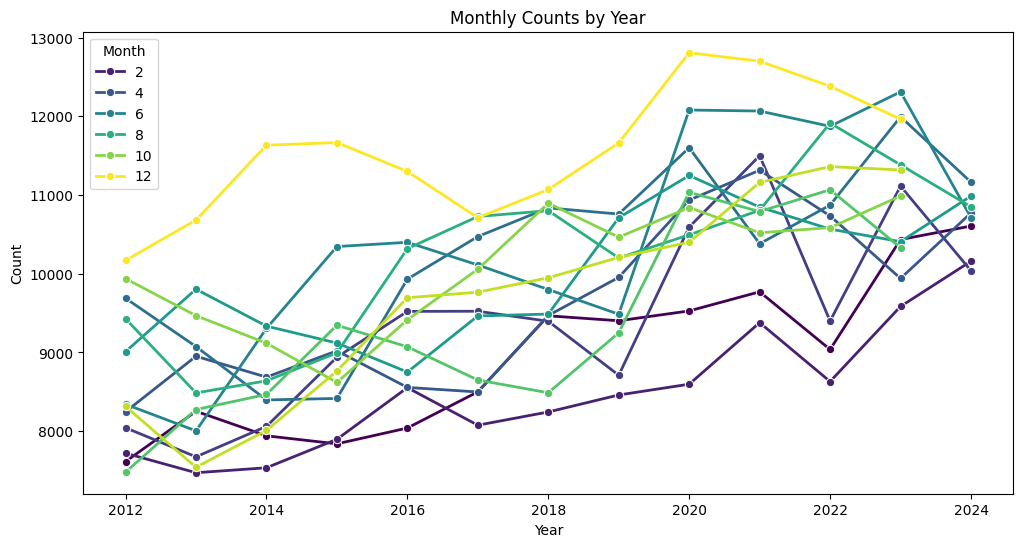

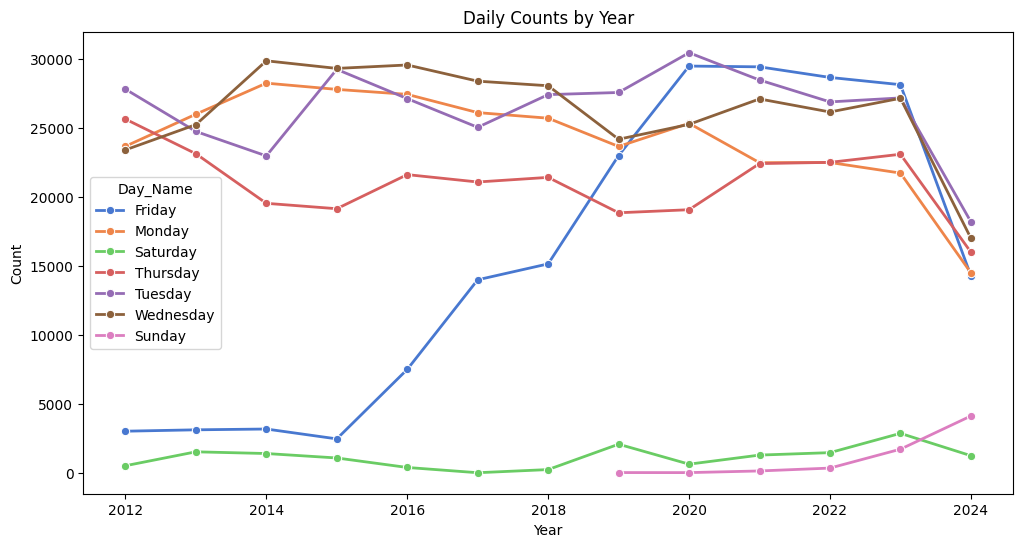

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_counts, x='Year', y='Count', hue='Month', marker='o', palette='viridis', linewidth=2)
plt.title('Monthly Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Create a new DataFrame with value counts for 'Day_Name' by 'Year'
day_counts = df.groupby(['Year', 'Day_Name']).size().reset_index(name='Count')

# Create a line plot for 'Day_Name' by 'Year'
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_counts, x='Year', y='Count', hue='Day_Name', marker='o', palette='muted', linewidth=2)
plt.title('Daily Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


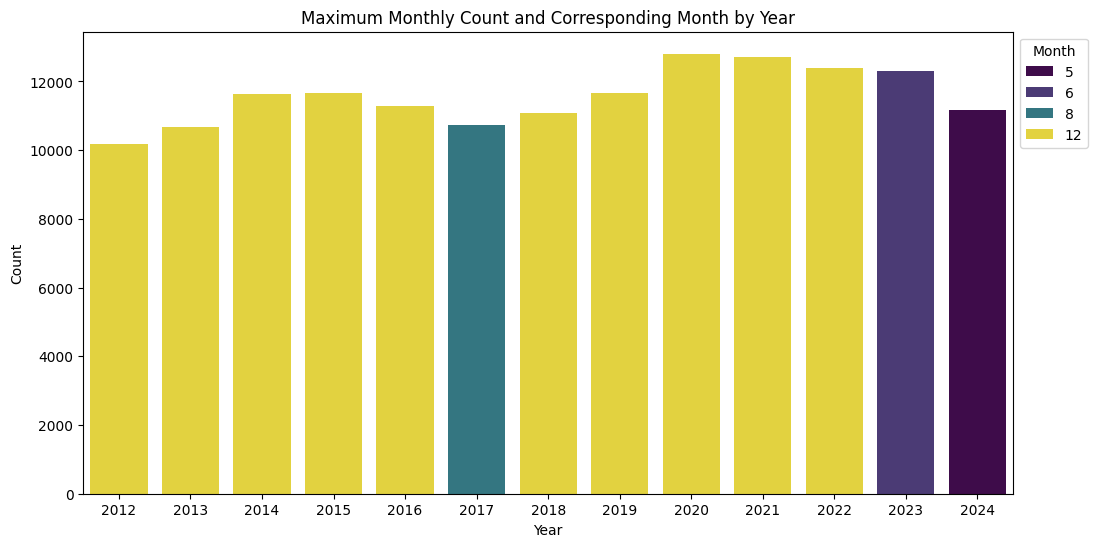

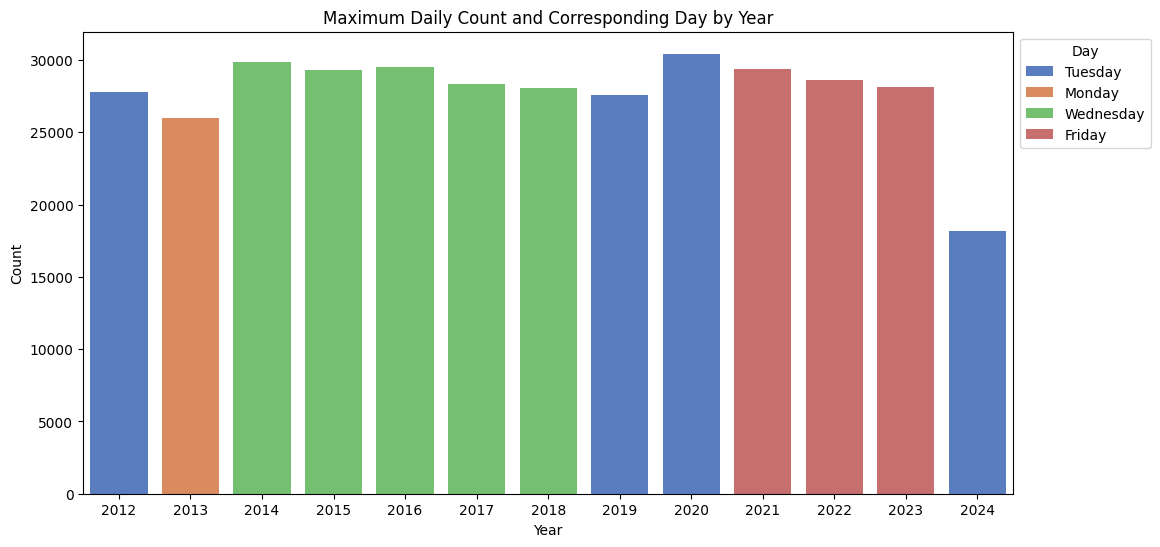

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

max_month_counts = month_counts.loc[month_counts.groupby('Year')['Count'].idxmax()]

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=max_month_counts, x='Year', y='Count', hue='Month', palette='viridis')
plt.title('Maximum Monthly Count and Corresponding Month by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Create a new DataFrame with the maximum count and corresponding day for each 'Year'
max_day_counts = day_counts.loc[day_counts.groupby('Year')['Count'].idxmax()]

# Create a bar plot for maximum counts and corresponding day by year for 'Day_Name'
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=max_day_counts, x='Year', y='Count', hue='Day_Name', palette='muted')
plt.title('Maximum Daily Count and Corresponding Day by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [29]:

average_sale_volume_by_year = df.groupby('Year')['VolumeSoldLiters'].mean().reset_index()

# Convert the average sale volume to millions
average_sale_volume_by_year['VolumeSoldLiters']

# Display the result
print(average_sale_volume_by_year)


    Year  VolumeSoldLiters
0   2012          9.063552
1   2013          9.037988
2   2014          9.111532
3   2015          9.018851
4   2016          8.871778
5   2017          9.236750
6   2018          9.500292
7   2019          9.415834
8   2020          9.184690
9   2021          9.549024
10  2022          9.241911
11  2023          8.989349
12  2024          8.962187


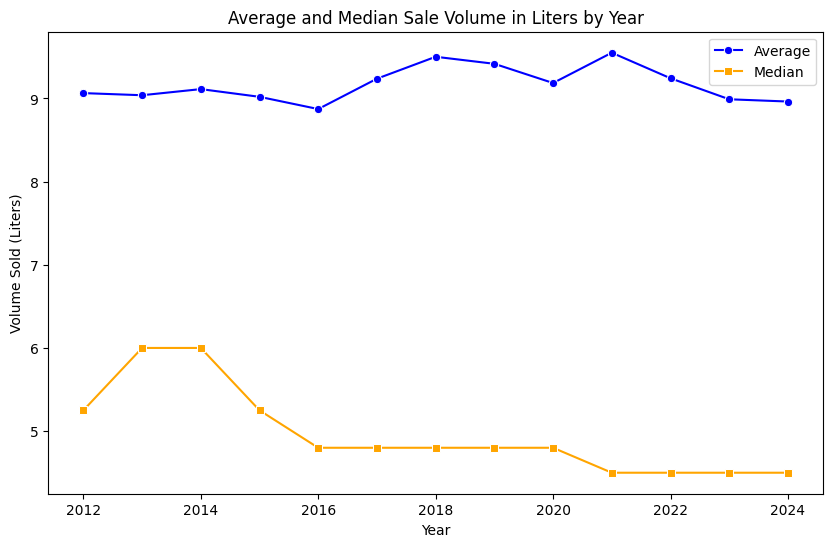

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Year' and calculate the average and median sale volume in liters
average_sale_volume_by_year = df.groupby('Year')['VolumeSoldLiters'].mean().reset_index()
median_sale_volume_by_year = df.groupby('Year')['VolumeSoldLiters'].median().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot average sale volume
sns.lineplot(data=average_sale_volume_by_year, x='Year', y='VolumeSoldLiters', marker='o', color='blue', label='Average')

# Plot median sale volume
sns.lineplot(data=median_sale_volume_by_year, x='Year', y='VolumeSoldLiters', marker='s', color='orange', label='Median')

plt.title('Average and Median Sale Volume in Liters by Year')
plt.xlabel('Year')
plt.ylabel('Volume Sold (Liters)')
plt.legend()  # Add legend to differentiate between avera



/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_2514/2831883625.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County', y='VolumeSoldLiters', data=top_counties_average, palette='viridis')


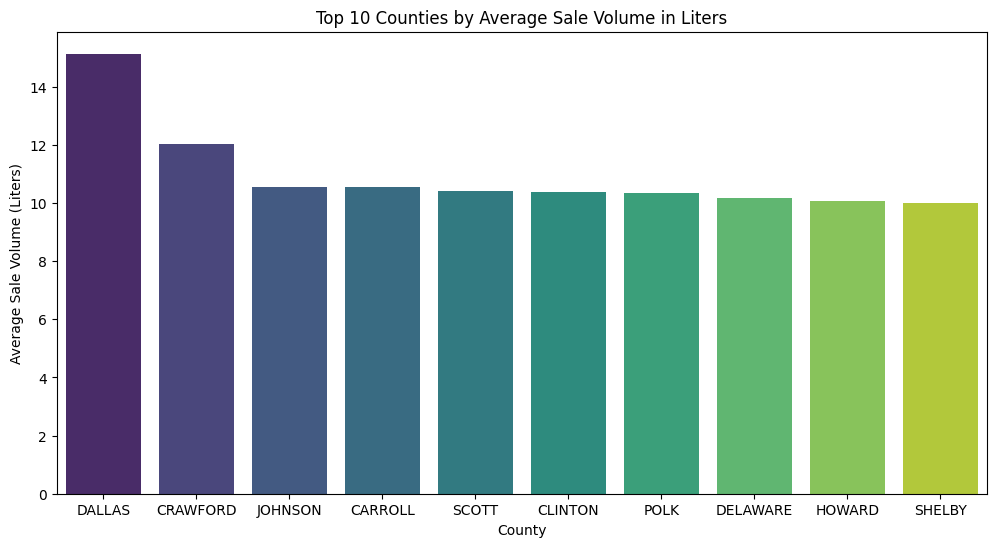

/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_2514/2831883625.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County', y='VolumeSoldLiters', data=top_counties_median, palette='viridis')


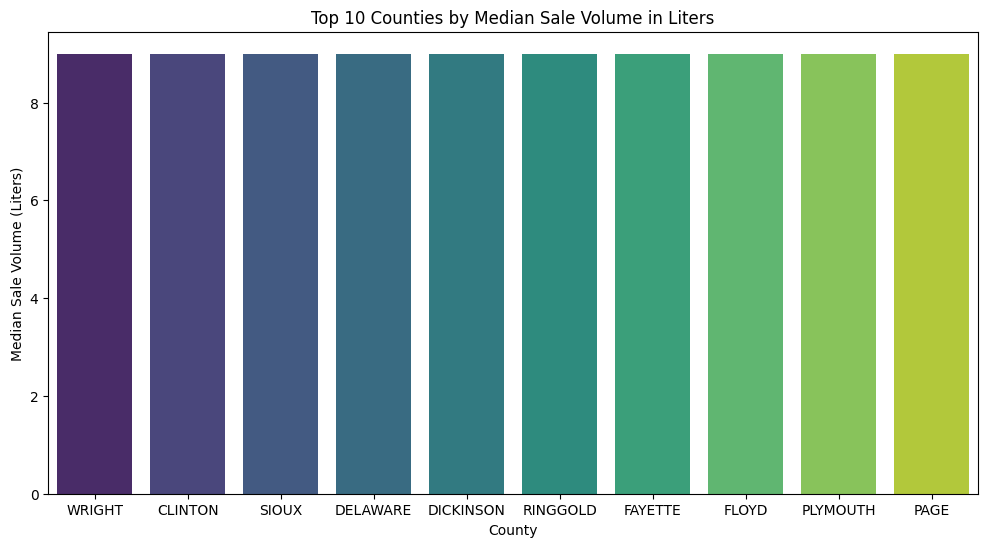

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'County' and calculate the average and median sale volume in liters
average_sale_volume_by_county = df.groupby('County')['VolumeSoldLiters'].mean().reset_index()
median_sale_volume_by_county = df.groupby('County')['VolumeSoldLiters'].median().reset_index()

# Sort the DataFrame by average sale volume in descending order and select top 10
top_counties_average = average_sale_volume_by_county.sort_values(by='VolumeSoldLiters', ascending=False).head(10)

# Sort the DataFrame by median sale volume in descending order and select top 10
top_counties_median = median_sale_volume_by_county.sort_values(by='VolumeSoldLiters', ascending=False).head(10)

# Create a bar plot for average sale volume
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='VolumeSoldLiters', data=top_counties_average, palette='viridis')
plt.title('Top 10 Counties by Average Sale Volume in Liters')
plt.xlabel('County')
plt.ylabel('Average Sale Volume (Liters)')
plt.show()

# Create a bar plot for median sale volume
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='VolumeSoldLiters', data=top_counties_median, palette='viridis')
plt.title('Top 10 Counties by Median Sale Volume in Liters')
plt.xlabel('County')
plt.ylabel('Median Sale Volume (Liters)')
plt.show()




      Year    County  VolumeSoldLiters
24    2012    DALLAS         15.448999
123   2013    DALLAS         17.283739
222   2014    DALLAS         21.393418
321   2015    DALLAS         14.539350
420   2016    DALLAS         15.568729
518   2017  CRAWFORD         21.189731
618   2018    DALLAS         15.214239
717   2019    DALLAS         27.036588
816   2020    DALLAS         17.912399
914   2021  CRAWFORD         16.211588
1072  2022    SHELBY         13.370632
1137  2023   JACKSON         13.401525
1210  2024   CLINTON         14.553131


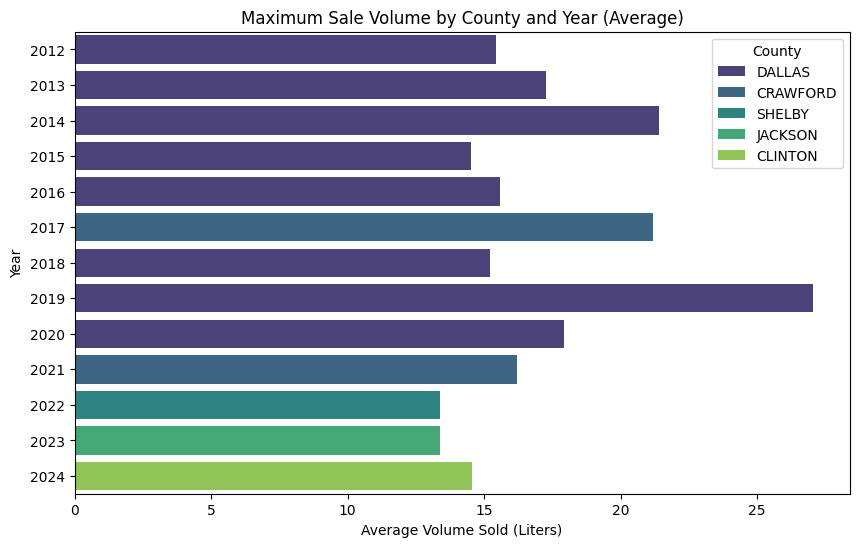

In [32]:

average_sale_volume_by_year_county = df.groupby(['Year', 'County'])['VolumeSoldLiters'].mean().reset_index()

# Find the index of the maximum sale volume for each year
max_volume_indices = average_sale_volume_by_year_county.groupby('Year')['VolumeSoldLiters'].idxmax()

# Select the rows corresponding to the maximum sale volume for each year
max_sale_volume_df = average_sale_volume_by_year_county.loc[max_volume_indices]

# Display the result
print(max_sale_volume_df)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=max_sale_volume_df, x='VolumeSoldLiters', y='Year', hue='County', orient='h', palette='viridis')
plt.title('Maximum Sale Volume by County and Year (Average)')
plt.xlabel('Average Volume Sold (Liters)')
plt.ylabel('Year')
plt.show()


In [33]:
# List of 8 specific counties
check_counties = ['Dubuque', 'Buchanan', 'Palo Alto', 'Boone', 'Carroll', 'Chickasaw', 'Winneshiek', 'Lee']
check_counties = [county.upper() for county in check_counties]
df_selected_counties = df[df['County'].isin(check_counties)]

# Group by 'Year' and calculate the average sale volume in liters for the selected counties
average_volume_by_county_yearly = df_selected_counties.groupby(['Year', 'County'])['VolumeSoldLiters'].mean().reset_index()

# Pivot the DataFrame to have separate columns for each county
df_pivoted = average_volume_by_county_yearly.pivot(index='Year', columns='County', values='VolumeSoldLiters').reset_index()

# Calculate the state average
state_average = df.groupby('Year')['VolumeSoldLiters'].mean().reset_index()

# Rename the 'VolumeSoldLiters' column to 'State'
state_average = state_average.rename(columns={'VolumeSoldLiters': 'State'})

# Merge the state average into the pivoted DataFrame
df_pivoted = pd.merge(df_pivoted, state_average, on='Year', how='left')
df_pivoted

,Year,BOONE,BUCHANAN,CARROLL,CHICKASAW,DUBUQUE,LEE,PALO ALTO,WINNESHIEK,State
0,2012,9.495640,6.817943,9.623449,10.134011,9.560516,10.172997,5.284147,6.963515,9.063552
1,2013,11.306206,7.880491,9.221687,9.981130,9.150289,9.189907,5.923296,7.385125,9.037988
2,2014,8.652079,9.763362,12.901510,9.802067,9.591240,9.256477,5.846891,7.948274,9.111532
3,2015,7.871362,7.201154,14.182365,7.846902,10.000439,10.636989,5.105971,8.448083,9.018851
4,2016,7.520450,6.705189,12.505201,7.313609,9.779314,10.717458,5.488894,10.161691,8.871778
5,2017,9.837827,9.966127,10.206169,6.889351,9.496801,10.166675,9.617478,9.435472,9.236750
6,2018,10.651293,6.158162,14.609000,8.675805,9.936869,9.444405,4.953568,9.204023,9.500292
7,2019,8.221452,7.045115,9.823623,15.914038,8.903558,8.688270,5.207629,8.906390,9.415834
8,2020,9.505289,8.227588,8.969226,11.942386,10.878446,10.148565,5.787059,9.922447,9.184690
9,2021,7.279441,6.120505,10.925342,8.390717,10.961818,8.879588,6.819284,10.108868,9.549024


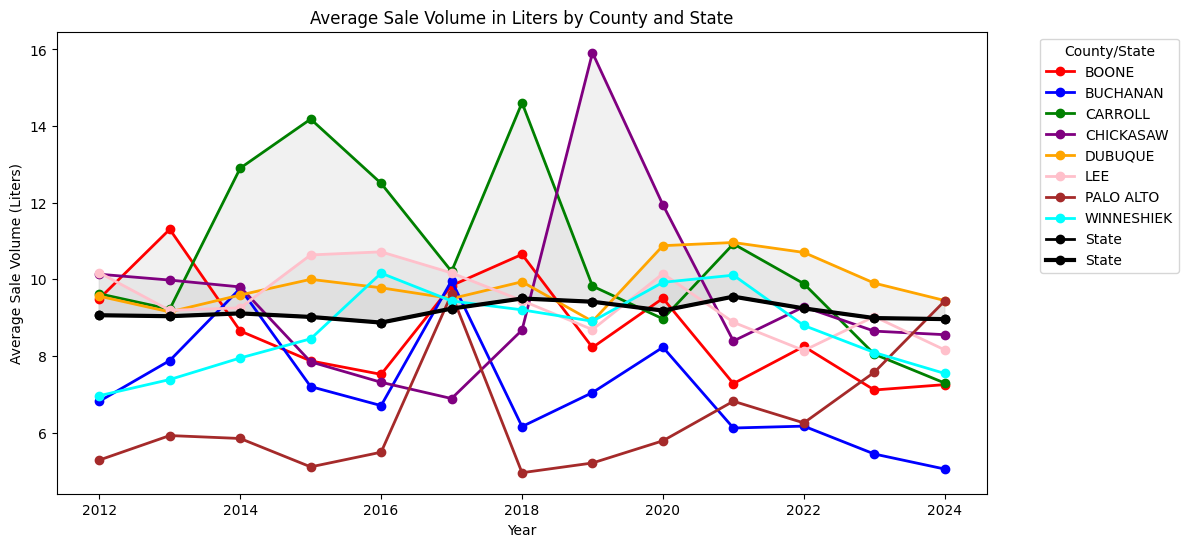

In [34]:
import matplotlib.pyplot as plt


# Set the 'Year' column as the index
df_pivoted.set_index('Year', inplace=True)

# Define vivid colors for the lines
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'black']

# Plot each line for the counties and state
plt.figure(figsize=(12, 6))
for i, county in enumerate(df_pivoted.columns):
    plt.plot(df_pivoted.index, df_pivoted[county], label=county, color=colors[i], linewidth=2, marker='o')

# Plot the state line with a thicker line
plt.plot(df_pivoted.index, df_pivoted['State'], label='State', color='black', linewidth=3, marker='o')

# Highlight counties with higher average than the state
for county in df_pivoted.columns[:-1]:
    plt.fill_between(df_pivoted.index, df_pivoted[county], df_pivoted['State'], where=df_pivoted[county] > df_pivoted['State'],
                     interpolate=True, color='lightgray', alpha=0.3)

# Add a legend and labels
plt.legend(title='County/State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Sale Volume in Liters by County and State')
plt.xlabel('Year')
plt.ylabel('Average Sale Volume (Liters)')

# Show the plot
plt.show()


In [35]:
ils5.columns

Index(['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address',
       'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber',
       'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons'],
      dtype='object')

In [36]:
df.columns

Index(['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address',
       'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber',
       'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons', 'Year', 'Month', 'Day_Name',
       'PercentageProfitMargin'],
      dtype='object')

In [37]:
df1 = df[["Year", "CategoryName", "ItemDescription"]]
df_vodka = df1[df1['CategoryName'].str.upper().str.contains('VODKA')]

top_vodkas_by_year = df_vodka.groupby(['Year', 'ItemDescription']).size().groupby('Year', group_keys=False).nlargest(3).reset_index(name='Count')

# Display the result
print(top_vodkas_by_year)

    Year               ItemDescription  Count
0   2012                 HAWKEYE VODKA   2391
1   2012            FIVE O'CLOCK VODKA   1990
2   2012         SMIRNOFF VODKA 80 PRF   1196
3   2013                 HAWKEYE VODKA   2418
4   2013            FIVE O'CLOCK VODKA   1957
5   2013         SMIRNOFF VODKA 80 PRF   1333
6   2014                 HAWKEYE VODKA   2548
7   2014            FIVE O'CLOCK VODKA   1801
8   2014         SMIRNOFF VODKA 80 PRF   1245
9   2015                 HAWKEYE VODKA   2638
10  2015            FIVE O'CLOCK VODKA   1851
11  2015         SMIRNOFF VODKA 80 PRF   1381
12  2016                 HAWKEYE VODKA   2623
13  2016            FIVE O'CLOCK VODKA   1872
14  2016  ABSOLUT SWEDISH VODKA 80 PRF   1232
15  2017                 HAWKEYE VODKA   2598
16  2017            FIVE O'CLOCK VODKA   1841
17  2017          TITOS HANDMADE VODKA   1537
18  2018                 HAWKEYE VODKA   2787
19  2018          TITOS HANDMADE VODKA   1827
20  2018            FIVE O'CLOCK V

In [38]:
df1 = df[["Year", "CategoryName", "ItemDescription"]]
df_whisky = df1[df1['CategoryName'].str.upper().str.contains('WHISK')]

top_whisky_by_year = df_whisky.groupby(['Year', 'ItemDescription']).size().groupby('Year', group_keys=False).nlargest(3).reset_index(name='Count')

# Display the result
print(top_whisky_by_year)

    Year                ItemDescription  Count
0   2012                   BLACK VELVET   2617
1   2012    SEAGRAMS 7 CROWN BL WHISKEY   1395
2   2012  JACK DANIELS OLD #7 BLACK LBL   1309
3   2013                   BLACK VELVET   2748
4   2013    SEAGRAMS 7 CROWN BL WHISKEY   1372
5   2013  JACK DANIELS OLD #7 BLACK LBL   1305
6   2014                   BLACK VELVET   2801
7   2014    SEAGRAMS 7 CROWN BL WHISKEY   1328
8   2014      FIREBALL CINNAMON WHISKEY   1326
9   2015                   BLACK VELVET   2867
10  2015      FIREBALL CINNAMON WHISKEY   1327
11  2015    SEAGRAMS 7 CROWN BL WHISKEY   1318
12  2016                   BLACK VELVET   3031
13  2016      FIREBALL CINNAMON WHISKEY   1364
14  2016    SEAGRAMS 7 CROWN BL WHISKEY   1347
15  2017                   BLACK VELVET   3018
16  2017      FIREBALL CINNAMON WHISKEY   1396
17  2017    SEAGRAMS 7 CROWN BL WHISKEY   1319
18  2018                   BLACK VELVET   3001
19  2018      FIREBALL CINNAMON WHISKEY   1561
20  2018     

In [39]:

# Filter the data for Flavored Liquors (Liqueurs and Cordials)
df_flavored_liquors = df1[df1['CategoryName'].str.upper().str.contains('LIQUEUR') | df1['CategoryName'].str.upper().str.contains('CORDIAL')]

# Group by 'Year' and 'ItemDescription', count occurrences, and find top 3 for each year
top_flavored_liquors_by_year = df_flavored_liquors.groupby(['Year', 'ItemDescription']).size().groupby('Year', group_keys=False).nlargest(3).reset_index(name='Count')

# Display the result
print(top_flavored_liquors_by_year)


    Year                           ItemDescription  Count
0   2012                      JAGERMEISTER LIQUEUR   1118
1   2012                          SOUTHERN COMFORT    899
2   2012                                  RUMCHATA    784
3   2013                      JAGERMEISTER LIQUEUR   1057
4   2013                 FIREBALL CINNAMON WHISKEY    941
5   2013                                  RUMCHATA    838
6   2014                 FIREBALL CINNAMON WHISKEY   1326
7   2014                      JAGERMEISTER LIQUEUR    973
8   2014                          SOUTHERN COMFORT    847
9   2015                 FIREBALL CINNAMON WHISKEY   1327
10  2015                      JAGERMEISTER LIQUEUR   1051
11  2015                          SOUTHERN COMFORT    846
12  2016                 FIREBALL CINNAMON WHISKEY   1364
13  2016                      JAGERMEISTER LIQUEUR    965
14  2016                          SOUTHERN COMFORT    854
15  2017                 FIREBALL CINNAMON WHISKEY   1396
16  2017      

I started by using the list and list function to find out the unique values in the county column. There are only 99 counties, so I did not need to correct anything.
I then move on to define a column called the PercentageProfitMargin column by first finding the profit = SaleDollars - StateBottleCost * BottlesSold and then changing it to a percentage. 
When I used the formula to find the mean, I saw the result as - infinity. I found out that some of the SaleDollars values were 0, causing some to be infinite. I when removed the 0 sale dollars value and recalculated the average profit margin to be $ 33.24.
I then counted all the sales data by Month and Day. The summary is displayed in two tables below.          

| Month | 12    | 6     | 8     | 5     | 10    | 7     | 11    | 4     | 3     | 9     | 1     | 2      |
|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|
| Counts| 138745| 134832| 133039| 133580| 120904| 129732| 116481| 125073| 122504| 112240| 116422| 110296 |


| Day        | Tuesday | Wednesday | Monday  | Thursday | Friday | Saturday | Sunday |
|------------|---------|-----------|---------|----------|--------|----------|--------|
| Counts     | 342909  | 340494    | 314962  | 273314   | 201253 | 14611    | 6305   |

Seeing these tables, it is seen that Iowans frequent Liquor stores mainly in the Months of December and June. Tuesday and Wednesday are the days Iowans regularly go to stores for liquors. Only a few people buy liquor on Sundays.
I then plotted the liquor store visit counts by month and days for every year and plotted two line charts. The Monthly count chart shows that visits are inclreasing over these years. December has been the favorite Month for Iowans to frequent Liquor stores for all these years except briefly in 2015  and 2023.
As for the days, Tuesdays and Wednesdays have been the best days for Iowans to go to Liquor stores. Starting in 2015, there has been a sharp rise in store visits on Fridays, and It has been the best day to visit the liquor store from mid-2022 until now. One other interesting fact from the char is that people really used to go to Liqior stores on Sundas, and since 2020, there have been some Iowans going to the stores, and the numbers are slowly increasing.

These data are also plotted with a bar chart for better visibility.
To check the claim about some Iowa Counties buying more liquors than others, we first decided to use VolumeSoldLiters (VLS) as it reflects the quantity purchased rather than the price. The following table shows that. 

| Year| 2012    | 2013    | 2014    | 2015    | 2016    | 2017    | 2018    | 2019    | 2020    | 2021     | 2022     | 2023     |  2024   |
|-----|---------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|---------|
| VLS | 9.063552| 9.037988| 9.111532| 9.018851| 8.871778| 9.236750| 9.500292| 9.415834| 9.184690| 9.549024 | 9.241911 | 8.989349 | 8.962187

There is no consistent increase in the sale of a quantity of alcohol. I also found out the counties where Liqore is about most on average each year. The average over the year is flat, and the median shows that it is going down. 
Dallas County has the maximum sale bottle volume average of any other county in 2012 -2-23. When We explored year-by-year data 

| Year | County   | Average VolumeSoldLiters |
|------|----------|--------------------------|
| 2012 | CRAWFORD | 19.898333                |
| 2013 | DALLAS   | 14.345443                |
| 2014 | MONROE   | 17.259250                |
| 2015 | DALLAS   | 14.558691                |
| 2016 | CLARKE   | 14.452593                |
| 2017 | DALLAS   | 16.640183                |
| 2018 | DALLAS   | 13.541739                |
| 2019 | DALLAS   | 22.456326                |
| 2020 | SHELBY   | 15.810447                |
| 2021 | DALLAS   | 13.801040                |
| 2022 | DALLAS   | 14.009727                |
| 2023 | CLINTON  | 13.534898                |

The news (https://k923.fm/which-iowa-counties-excessively-drink-the-most-alcohol/) reported in August 2023 that:
"Both Dubuque and Buchanan counties reported having 27% of adults who are considered to be excessive drinkers. Both these eastern Iowa counties beat out the state average by 2%. Some counties weren't too far behind as Palo Alto, Boone, Carroll, Chickasaw, Winneshiek, and Lee, all reported 26% of adults being excessive drinkers."
These are the year-by-year maximum average Average VolumeSoldLiters. As we can see, these do not have any only one of the counties mentioned in the news, which were['Dubuque,' 'Buchanan,' 'Palo Alto,' 'Boone,' 'Carroll,' 'Chickasaw,' 'Winneshiek,' 'Lee']. Please note that we have only the 5\% of the data. However, this data does not support the claim.
Here are the counties with the highest averages in volumesolddollars
|Year |	BOONE	 |  BUCHANAN |	CARROLL	 | CHICKASAW |  DUBUQUE	 |   LEE	  | PALO ALTO  |WINNESHIEK |State  |
|-----|--------- |-----------|------------|-----------|-----------|------------|------------|-----------|-------|
|2012 |	9.495640 |	6.817943 |	9.623449|	10.134011|	9.560516|	10.172997|	5.284147|	6.963515|	9.063552|
|2013 |11.306206 |	7.880491 |	9.221687|	9.981130|	9.150289|	9.189907|	5.923296|	7.385125|	9.037988|
|2014 |	8.652079 |	9.763362 |	12.901510|	9.802067|	9.591240|	9.256477|	5.846891|	7.948274|	9.111532|
|2015 |	7.871362 |	7.201154 |	14.182365|	7.846902|	10.000439|	10.636989|	5.105971|	8.448083|	9.018851|
|2016 |	7.520450 |	6.705189 |	12.505201|	7.313609|	9.779314|	10.717458|	5.488894|	10.161691|	8.871778|
|2017 |	9.837827 |	9.966127 |	10.206169|	6.889351|	9.496801|	10.166675|	9.617478|	9.435472|	9.236750|
|2018 |	10.651293|	6.158162 |	14.609000|	8.675805|	9.936869|	9.444405|	4.953568|	9.204023|	9.500292|
|2019 |	8.221452 |  7.045115 |  9.823623|	15.914038|	8.903558|	8.688270|	5.207629|	8.906390|	9.415834|
|2020 |	9.505289 |	8.227588 |	8.969226|	11.942386|	10.878446|	10.148565|	5.787059|	9.922447|	9.184690|
|2021 |	7.279441 |	6.120505 |	10.925342|	8.390717	|10.961818|	8.879588|	6.819284|	10.108868|	9.549024|
|2022 |	8.249297 |	6.169396 |	9.886646|	9.282736|	10.702169|	8.142674|	6.253521|	8.795990|	9.241911|
|2023 |	7.112507 |	5.442055 |	8.047979|	8.648876|	9.901154|	9.029103|	7.575151|	8.090658|	8.989349|
|2024 |	7.252698 |	5.049269 |	7.294029|	8.555822|	9.447211|	8.158497|	9.438425|	7.544130|	8.962187|

I also plotted the highlighted data in the line plot. It is noted that Carroll and Dubuque County have been higher than the state average the whole time. 
So, to comment on the truth/falisty of the news, we need more data to calculate the claim. There is no way for us to find what adults drink more often than others without using other demographic and population data together with their personalized buying habits. Many counties mentioned in the news only show up in our analysis of Dubuque. In this sampled data, we can say the Dubuque consumed more liquor consistently over these years compared to other counties and states' averages.

To answer what are the top three selling Vodkas, Whiskies, and flavored liquors ( Liqueurs and Cordials) by year?
Hawkeye Vodka has been consistently Iowan's favorite. Smirnoff and Five-O clock Vodkas were popular and have been recently replaced by Titos Voda and MCCORMICK 80PRF VODKA PET. In the whiskies, Black Velvet is a consistent one. and the other famous whiskies  SEAGRAMS 7 CROWN BL WHISKEY JACK DANIELS OLD #7 BLACK LBL  has recently been replaced by FIREBALL CINNAMON WHISKEY, CROWN ROYAL REGAL APPLE in recent years.

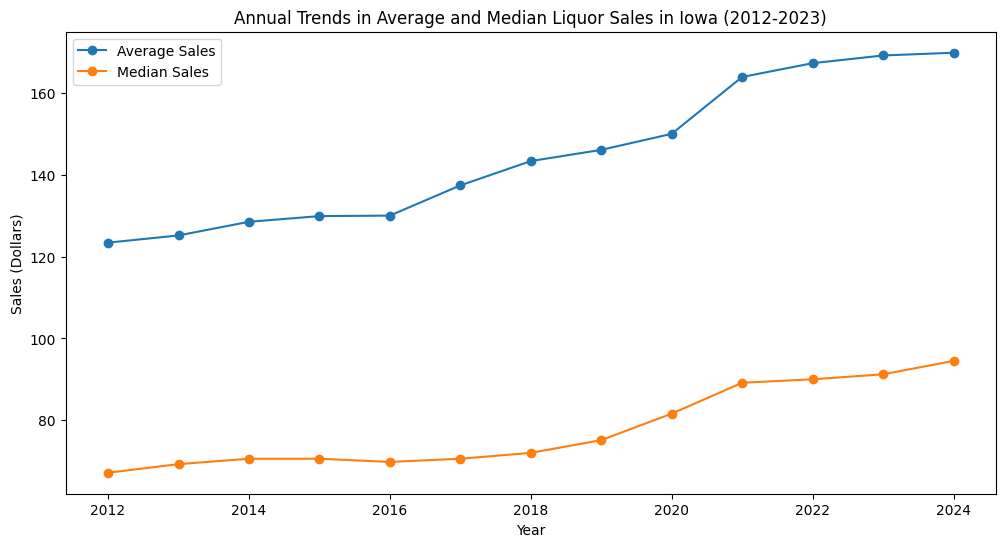

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# Group by 'Year' and calculate annual average and median sales
annual_sales = df.groupby('Year')['SaleDollars'].agg(['mean', 'median']).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot annual trends in average and median sales
plt.plot(annual_sales['Year'], annual_sales['mean'], label='Average Sales', marker='o')
plt.plot(annual_sales['Year'], annual_sales['median'], label='Median Sales', marker='o')

# Add labels and title
plt.title('Annual Trends in Average and Median Liquor Sales in Iowa (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Sales (Dollars)')
plt.legend()
plt.show()


/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_2514/1563620009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VolumeSoldLiters', y='Month', data=monthly_volume, palette='viridis', orient='h')


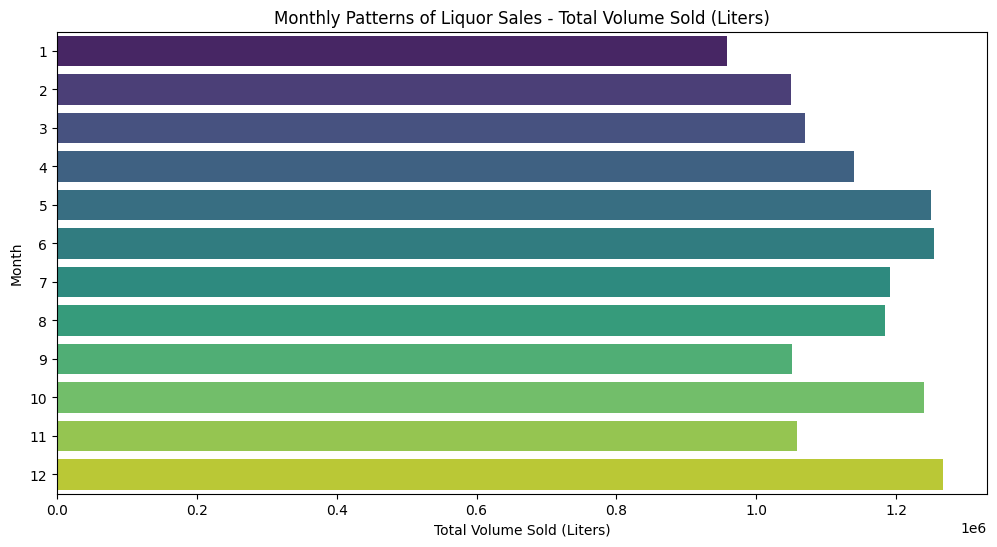

/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_2514/1563620009.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_Name', y='SaleDollars', data=daily_average_sales, palette='viridis')


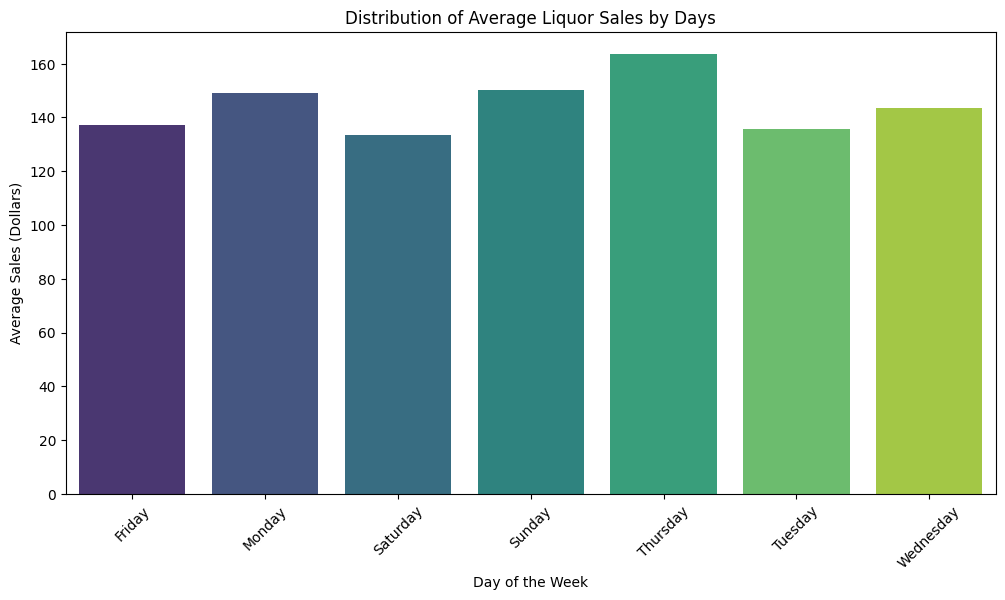

In [41]:


# Group by 'Month' and calculate total volume sold in Liters
monthly_volume = df.groupby('Month')['VolumeSoldLiters'].sum().reset_index()

# Group by 'Month' and calculate total volume sold in Liters
monthly_volume = df.groupby('Month')['VolumeSoldLiters'].sum().reset_index()

# Create a horizontal bar plot for monthly total volume sold
plt.figure(figsize=(12, 6))
sns.barplot(x='VolumeSoldLiters', y='Month', data=monthly_volume, palette='viridis', orient='h')
plt.title('Monthly Patterns of Liquor Sales - Total Volume Sold (Liters)')
plt.xlabel('Total Volume Sold (Liters)')
plt.ylabel('Month')
plt.show()

# Group by 'Day_Name' and calculate average sales in Dollars
daily_average_sales = df.groupby('Day_Name')['SaleDollars'].mean().reset_index()

# Create a vertical bar plot for the distribution of average sales by days
plt.figure(figsize=(12, 6))
sns.barplot(x='Day_Name', y='SaleDollars', data=daily_average_sales, palette='viridis')
plt.title('Distribution of Average Liquor Sales by Days')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales (Dollars)')
plt.xticks(rotation=45)
plt.show()


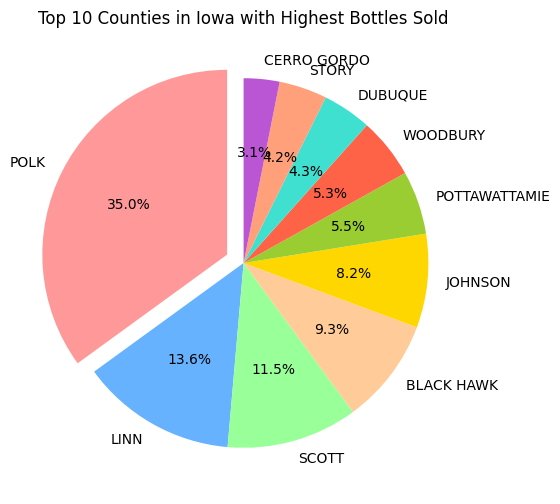

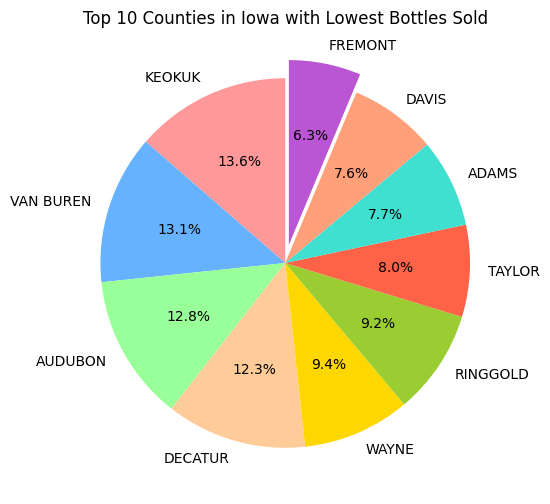

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'County' and calculate total number of bottles sold
county_bottles_sold = df.groupby('County')['BottlesSold'].sum().reset_index()

# Sort the DataFrame by bottles sold in descending order
county_bottles_sold = county_bottles_sold.sort_values(by='BottlesSold', ascending=False)

# Extract the top 10 counties with the highest and lowest bottles sold
top_10_counties_high = county_bottles_sold.head(10)
top_10_counties_low = county_bottles_sold.tail(10)

# Define vivid colors for the pie charts
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#9ACD32', '#FF6347', '#40E0D0', '#FFA07A', '#BA55D3']

# Create a pie chart for the distribution of bottles sold in the top 10 counties
plt.figure(figsize=(12, 6))
explode_high = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice
plt.pie(top_10_counties_high['BottlesSold'], labels=top_10_counties_high['County'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode_high)
plt.title('Top 10 Counties in Iowa with Highest Bottles Sold')
plt.show()

# Create a pie chart for the distribution of bottles sold in the bottom 10 counties
plt.figure(figsize=(12, 6))
explode_low = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)  # Explode the last slice
plt.pie(top_10_counties_low['BottlesSold'], labels=top_10_counties_low['County'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode_low)
plt.title('Top 10 Counties in Iowa with Lowest Bottles Sold')
plt.show()


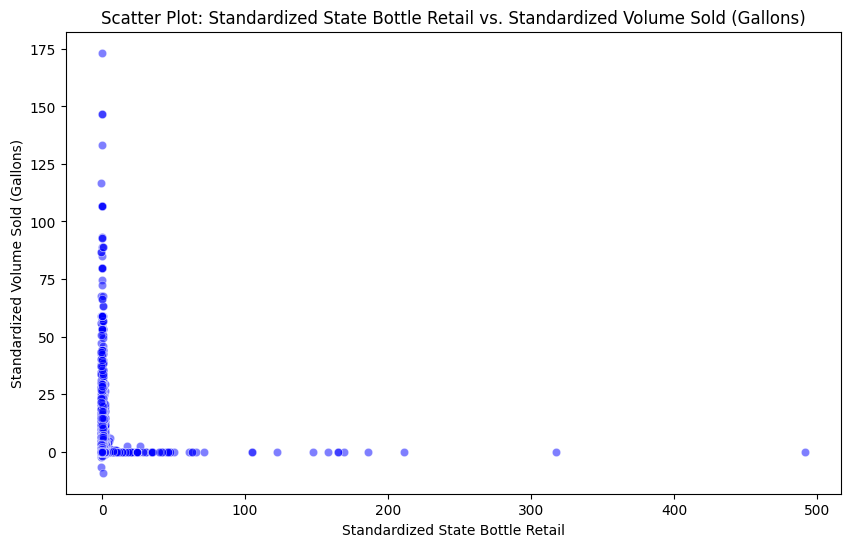

In [43]:

from sklearn.preprocessing import StandardScaler

columns_of_interest = ['StateBottleRetail', 'VolumeSoldGallons']

# Create a DataFrame with the selected columns
data = df[columns_of_interest]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Create a DataFrame with standardized data
df_standardized = pd.DataFrame(standardized_data, columns=columns_of_interest)

# Create a scatter plot with standardized variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StateBottleRetail', y='VolumeSoldGallons', data=df_standardized, alpha=0.5, color='blue')

# Set plot labels and title
plt.title('Scatter Plot: Standardized State Bottle Retail vs. Standardized Volume Sold (Gallons)')
plt.xlabel('Standardized State Bottle Retail')
plt.ylabel('Standardized Volume Sold (Gallons)')

# Display the plot
plt.show()


In [44]:
df.columns
outlier_df = df[['Category', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons', 'Year', 'Month','PercentageProfitMargin']]

In [45]:

# Calculate the number of outliers for each column
outliers_count = (outlier_df.apply(lambda x: (x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
                (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))))).sum()
outliers_count

Category                   20833
Pack                      176056
BottleVolumeMl            441016
StateBottleCost            86472
StateBottleRetail          86514
BottlesSold                70386
SaleDollars                93483
VolumeSoldLiters           53146
VolumeSoldGallons          67573
Year                           0
Month                          0
PercentageProfitMargin    218320
dtype: int64

/opt/anaconda3/envs/work/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


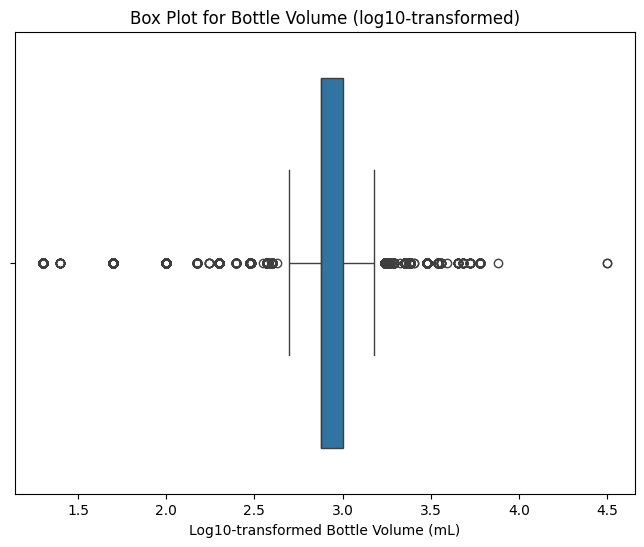

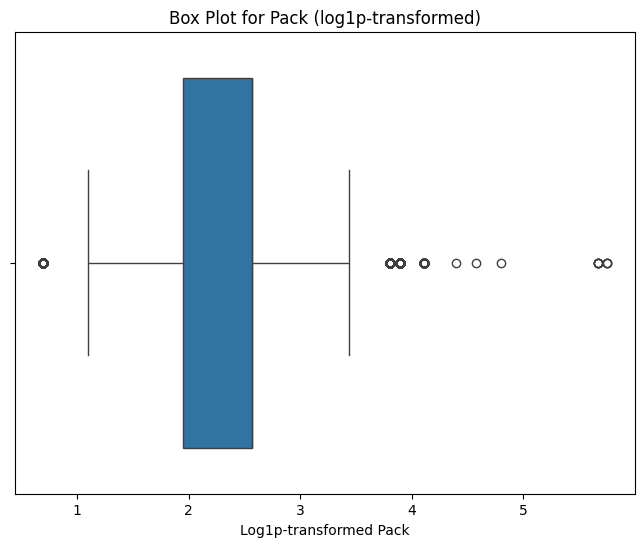

In [46]:
import numpy as np

box_df = df[['BottleVolumeMl', 'Pack']]

# Create a box plot for 'BottleVolumeMl' with log10 transformation
plt.figure(figsize=(8, 6))
sns.boxplot(x=np.log10(box_df['BottleVolumeMl']))
plt.title('Box Plot for Bottle Volume (log10-transformed)')
plt.xlabel('Log10-transformed Bottle Volume (mL)')
plt.show()

# Create a box plot for 'Pack' with log1p transformation
plt.figure(figsize=(8, 6))
sns.boxplot(x=np.log1p(box_df['Pack']))
plt.title('Box Plot for Pack (log1p-transformed)')
plt.xlabel('Log1p-transformed Pack')
plt.show()


The analysis of average and median total sales shows a steady increase in the sale amount. There is a little more sharp rise duing the pick COvid Years 2020 and 2021. The plot does show that it has started to flatten. 
The monthly analysis shows that December and October are the months for the most amount when looking at the average volume sold in liters. Saturday is the least, and Tuesday is the most when we find the average volume sold in liters by day.
Polk County has the highest of the top 10 in an average bottle sold, with 35.0 %, and Fremont County is the least of the least, with just 6.3%.
The scatter plot needs to be clarified even after scaling the columns and is not very helpful in giving us insights. 
The columns with the highest outliers below and above are Pack with 176056 outliers and 
BottleVolumeMl with 441016 outliers. The  % profit margin column we created column does have the second largest number of outliers. I picked the original 2 for our further analysis.
For the box plot of these, I had to transform them by using log transformation. We used log10 for the Pack and Log1 plus ( Natural log of 1 plus). With this transformation, the box plots are visible and show the outliers clearly. Pack has more outliers on the upper side, and the BottleVolumeMl has outliers on both sides.

In [47]:
df.columns

Index(['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address',
       'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber',
       'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons', 'Year', 'Month', 'Day_Name',
       'PercentageProfitMargin'],
      dtype='object')

In [48]:
df.head()

,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name,PercentageProfitMargin
0,S22365300072,2014-11-13,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442,POINT (-95.348601 42.012395),24.0,CRAWFORD,...,4.34,6.51,1,6.51,0.75,0.20,2014,11,Thursday,33.333333
1,INV-53293100064,2022-11-22,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,POINT (-96.42021 42.51054),77.0,WOODBURY,...,8.00,12.00,1,12.00,0.75,0.19,2022,11,Tuesday,33.333333
2,INV-50001000036,2022-08-02,2567,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.0,POINT (-90.608201 41.560663),77.0,SCOTT,...,7.50,11.25,6,67.50,4.50,1.18,2022,8,Tuesday,33.333333
3,S32231300157,2016-05-10,2565,HY-VEE FOOD STORE / SPENCER,819 N GRAND AVE,SPENCER,51301,POINT (-95.14506 43.145897),21.0,CLAY,...,7.47,11.21,6,67.26,4.50,1.19,2016,5,Tuesday,33.363069
4,INV-00438700005,2016-09-21,4582,PRONTO / SPIRIT LAKE,"2402, 17TH ST",SPIRIT LAKE,51360,POINT (-95.126585 43.42282),30.0,DICKINSON,...,5.78,8.67,4,34.68,3.00,0.79,2016,9,Wednesday,33.333333


In [49]:
columns = ['ZipCode', "County" ,'Category', 'CategoryName', 'VendorName', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters', 'VolumeSoldGallons', 'Year', 'Month', 'Day_Name']
reg_df = df[columns]
reg_df.shape

(1493848, 16)

In [50]:
reg_df.head()

,ZipCode,County,Category,CategoryName,VendorName,Pack,BottleVolumeMl,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name
0,51442,CRAWFORD,1081312.0,BUTTERSCOTCH SCHNAPPS,LUXCO-ST LOUIS,12,750,4.34,6.51,1,6.51,0.75,0.20,2014,11,Thursday
1,51103,WOODBURY,1031200.0,AMERICAN FLAVORED VODKA,E & J GALLO WINERY,12,750,8.00,12.00,1,12.00,0.75,0.19,2022,11,Tuesday
2,52806.0,SCOTT,1081400.0,AMERICAN SCHNAPPS,SAZERAC COMPANY INC,12,750,7.50,11.25,6,67.50,4.50,1.18,2022,8,Tuesday
3,51301,CLAY,1062310.0,SPICED RUM,HEAVEN HILL BRANDS,12,750,7.47,11.21,6,67.26,4.50,1.19,2016,5,Tuesday
4,51360,DICKINSON,1062400.0,SPICED RUM,HEAVEN HILL BRANDS,12,750,5.78,8.67,4,34.68,3.00,0.79,2016,9,Wednesday


In [51]:
reg_df.dtypes

ZipCode               object
County                object
Category             float64
CategoryName          object
VendorName            object
Pack                   int64
BottleVolumeMl         int64
StateBottleCost      float64
StateBottleRetail    float64
BottlesSold            int64
SaleDollars          float64
VolumeSoldLiters     float64
VolumeSoldGallons    float64
Year                   int32
Month                  int32
Day_Name              object
dtype: object

In [52]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# One-hot encode nominal columns
cat_columns = ['County', 'CategoryName', 'VendorName', 'Day_Name']
reg_df = pd.get_dummies(reg_df, columns=cat_columns)
reg_df.head()

,ZipCode,Category,Pack,BottleVolumeMl,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,...,VendorName_YAHARA BAY DISTILLERS INC,"VendorName_YAHARA BAY DISTILLERS, INC","VendorName_ZING ZANG, LLC",Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,51442,1081312.0,12,750,4.34,6.51,1,6.51,0.75,0.20,...,False,False,False,False,False,False,False,True,False,False
1,51103,1031200.0,12,750,8.00,12.00,1,12.00,0.75,0.19,...,False,False,False,False,False,False,False,False,True,False
2,52806.0,1081400.0,12,750,7.50,11.25,6,67.50,4.50,1.18,...,False,False,False,False,False,False,False,False,True,False
3,51301,1062310.0,12,750,7.47,11.21,6,67.26,4.50,1.19,...,False,False,False,False,False,False,False,False,True,False
4,51360,1062400.0,12,750,5.78,8.67,4,34.68,3.00,0.79,...,False,False,False,False,False,False,False,False,False,True


In [53]:
label_encoder = LabelEncoder()
reg_df['ZipCode'] = label_encoder.fit_transform(reg_df['ZipCode'].astype(str))

In [58]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = reg_df.drop('SaleDollars', axis=1)
y = reg_df['SaleDollars']

# Create SelectKBest with k=50 (corrected with the k keyword)
selectkbest = SelectKBest(f_regression, k=50)

# Fit and transform X using SelectKBest
X_selected = selectkbest.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selectkbest.get_support(indices=True)

# Extract the selected features from X
X_selected = X.iloc[:, selected_feature_indices]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Predictions on validation set
y_val_pred = model.predict(X_val)

# Predictions on test set
y_test_pred = model.predict(X_test)

# RMSE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# RMSE for validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# R^2 for training set
r2_train = r2_score(y_train, y_train_pred)

# R^2 for validation set
r2_val = r2_score(y_val, y_val_pred)

# R^2 for test set
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f'Training Set - RMSE: {rmse_train}, R^2: {r2_train}')
print(f'Validation Set - RMSE: {rmse_val}, R^2: {r2_val}')
print(f'Test Set - RMSE: {rmse_test}, R^2: {r2_test}')


Training Set - RMSE: 237.10513018555184, R^2: 0.7498880276878972
Validation Set - RMSE: 248.1687488107872, R^2: 0.7440118832764465
Test Set - RMSE: 216.5410304672068, R^2: 0.7637563671593851


In [59]:
top_categories = df['CategoryName'].value_counts().nlargest(5).index.tolist()
top_categories

['AMERICAN VODKAS',
 'CANADIAN WHISKIES',
 'STRAIGHT BOURBON WHISKIES',
 'SPICED RUM',
 'WHISKEY LIQUEUR']

In [60]:
class_df = df[df['CategoryName'].isin(top_categories)]
print(class_df.columns)
print(class_df.shape)

Index(['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address',
       'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber',
       'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons', 'Year', 'Month', 'Day_Name',
       'PercentageProfitMargin'],
      dtype='object')
(534579, 28)


In [61]:
columns = ['ZipCode', "County" ,'Category', 'CategoryName', 'VendorName', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters', 'VolumeSoldGallons', 'Year', 'Month', 'Day_Name']

In [62]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.feature_selection import VarianceThreshold
# Assuming class_x and class_y are your feature matrix and target variable
class_x = pd.get_dummies(class_df[columns])
class_y = class_df.CategoryName

# Remove features with zero variance
vt = VarianceThreshold()
class_xx = vt.fit_transform(class_x)
# Feature selection using SelectKBest with k=100
k_best = 65
selector = SelectKBest(f_classif, k=k_best)
class_x_selected = selector.fit_transform(class_xx, class_y)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(class_x_selected, class_y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a Logistic Regression model for multiclass classification
classifier = LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

# Train the model on the training set
classifier.fit(X_train, y_train)

# Predictions on training set
y_train_pred = classifier.predict(X_train)

# Predictions on validation set
y_val_pred = classifier.predict(X_val)

# Predictions on test set
y_test_pred = classifier.predict(X_test)

# Evaluate the model performance
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Additional metric (you can choose others)
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Display the results
print(f'Training Set Accuracy: {accuracy_train}')
print(f'Validation Set Accuracy: {accuracy_val}')
print(f'Test Set Accuracy: {accuracy_test}')
print(f'Test Set Precision: {precision_test}')

/opt/anaconda3/envs/work/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/work/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Set Accuracy: 0.9884893701266106
Validation Set Accuracy: 0.9882524598750421
Test Set Accuracy: 0.9885424071233492
Test Set Precision: 0.9885609180820862


In [64]:
df.columns

Index(['InvoiceItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address',
       'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'VendorName', 'ItemNumber',
       'ItemDescription', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',
       'VolumeSoldGallons', 'Year', 'Month', 'Day_Name',
       'PercentageProfitMargin'],
      dtype='object')

For the regression, I dropped many columns that are related to identifying the items, categorical nominal values that are not repeated, and also dropped cities. In the end, I was left with the started with the following variable 'ZipCode,' "County,"'Category,' 'CategoryName,' 'VendorName,' 'Pack,' 'BottleVolumeMl,' 'StateBottleCost,'
       'StateBottleRetail,' 'BottlesSold,' 'SaleDollars,' 'VolumeSoldLiters,' 'VolumeSoldGallons,' 'Year,' 'Month,' 'Day_Name.' Some of these are categorical, but the plan was to dummy-code them. I then dummy-coded all the categorical ones in the above list, and I ended up with data of sizes (1408580 and 1643). That is way too many columns. So, the select k best method is used to filter out the features that are not important. Among the ej columns, we have, SaleDollars as it relates to the sale price for each visit, so using this as a target for the regression model is a good idea. I also chose to go with the OLS linear regression for its simplicity and computational efficiency compared to others.
I selected 50, 100, 150, and 200 features to see how things go. The metrics I used, RMSE and R^2, did not change much, so I decided to go with k = 50. Testing, Training, and Validation metrics with the details above are very close to each other, with 

|  Data                  | RMSE       | R^2        |
|--------------------|------------|------------|
| Training Set       | 237.10     | 0.74       |
| Validation Set     | 248.16     | 0.74       |
| Test Set           | 216.54     | 0.76       |

Now for the classification task, I explored the category name and found out that the top 5 categories are 'AMERICAN VODKAS,' 'CANADIAN WHISKIES,'' STRAIGHT BOURBON WHISKIES,'' SPICED RUM,'' WHISKEY LIQUEUR'. I then use the same columns as in the regression columns filed only for the rows that contain the above five categories. The data we had after all this filtering and dummy coding, we ended up with the data with a dimension of (497026, 1329). After trying several combinations of a number of features and ML models, we went with the Multiclass variation of the logistic regression model as we have a multiclass regression model. Many other models I tested took a long time. Here are the metrics I got for my final model with the following details with k = 65.

|      Data              | Accuracy   | Precision  |
|--------------------|------------|------------|
| Training Set       | 0.98       | -          |
| Validation Set     | 0.98       | -          |
| Test Set           | 0.98       | 0.98       |

To make these models better, we could use more information, such as city and stored details. Many people prepare to buy their liquors in a particular store, such as Hy Vee, and others may not care where they buy. This information can be used by dummy coding. The description of the item has details and words that could be used by adding more features using some text analysis methods. Another method to use is parameter turning. Techniques such as normalization/standardization in the models, choosing various score functions or k for the select function, and using Grid search for parameter tuning can be used to make models perform better.

In [66]:
cluster_df = df[['Category', 'Pack', 'BottleVolumeMl', 'StateBottleCost','StateBottleRetail', 'BottlesSold',
                 'SaleDollars', 'VolumeSoldLiters','VolumeSoldGallons', 'Year', 'Month']]
cluster_df.dtypes

Category             float64
Pack                   int64
BottleVolumeMl         int64
StateBottleCost      float64
StateBottleRetail    float64
BottlesSold            int64
SaleDollars          float64
VolumeSoldLiters     float64
VolumeSoldGallons    float64
Year                   int32
Month                  int32
dtype: object

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming cluster_df is your dataframe
selected_features = cluster_df[['Category', 'Pack', 'BottleVolumeMl', 'StateBottleCost',
                                'StateBottleRetail', 'BottlesSold', 'SaleDollars',
                                'VolumeSoldLiters', 'VolumeSoldGallons', 'Year', 'Month']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
vif_data["VIF"] = vif_data["VIF"].round(2)
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

# Display VIF values without exponential notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the sorted VIF data
print(vif_data_sorted)

              Feature        VIF
7    VolumeSoldLiters 5866733.03
8   VolumeSoldGallons 5865650.52
4   StateBottleRetail   10055.95
3     StateBottleCost   10049.13
9                Year     183.67
0            Category     161.90
5         BottlesSold       6.12
1                Pack       5.84
2      BottleVolumeMl       5.78
10              Month       4.71
6         SaleDollars       4.19


In [68]:
print(list(vif_data_sorted.Feature))

['VolumeSoldLiters', 'VolumeSoldGallons', 'StateBottleRetail', 'StateBottleCost', 'Year', 'Category', 'BottlesSold', 'Pack', 'BottleVolumeMl', 'Month', 'SaleDollars']


In [69]:
!pip install --upgrade threadpoolctl

In [70]:
!pip install yellowbrick

In [71]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="yellowbrick")

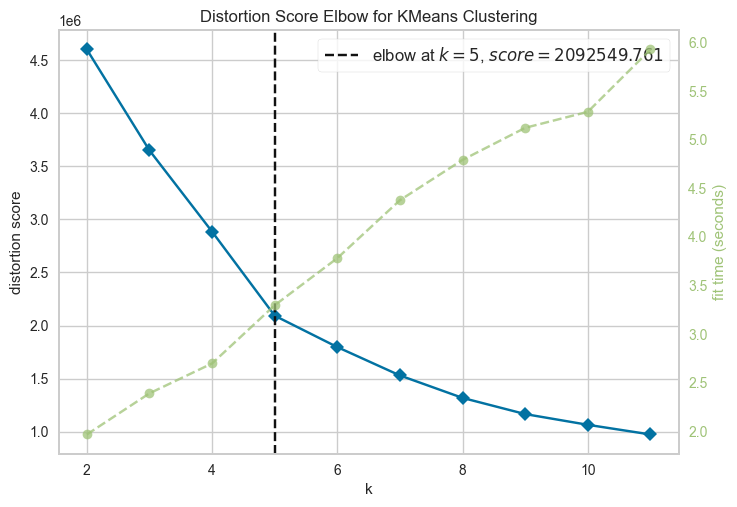

Optimal k: 5


In [72]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import warnings

# Assuming you have a DataFrame 'df' with the specified columns
cluster_cols = ['Pack', 'Month', 'SaleDollars', 'BottleVolumeMl']
cluster_data = df[cluster_cols]

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Suppress the warnings
warnings.filterwarnings("ignore", category=UserWarning, module="yellowbrick")

# Set n_init explicitly to suppress the warning
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(cluster_data_scaled)
visualizer.show()

# Print the optimal k
optimal_k = visualizer.elbow_value_
print(f'Optimal k: {optimal_k}')


In [83]:

# Assuming you have a DataFrame 'df' with the specified columns
cluster_cols = ['Pack', 'Month', 'SaleDollars', 'BottleVolumeMl']
cluster_data = df[cluster_cols]

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Set a seed for reproducibility
np.random.seed(42)

# Perform KMeans clustering with k=6
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Clusters'] = kmeans.fit_predict(cluster_data_scaled)

df.head()

,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name,PercentageProfitMargin,Clusters
0,S22365300072,2014-11-13,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442,POINT (-95.348601 42.012395),24.00,CRAWFORD,...,6.51,1,6.51,0.75,0.20,2014,11,Thursday,33.33,2
1,INV-53293100064,2022-11-22,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,POINT (-96.42021 42.51054),77.00,WOODBURY,...,12.00,1,12.00,0.75,0.19,2022,11,Tuesday,33.33,2
2,INV-50001000036,2022-08-02,2567,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.00,POINT (-90.608201 41.560663),77.00,SCOTT,...,11.25,6,67.50,4.50,1.18,2022,8,Tuesday,33.33,2
3,S32231300157,2016-05-10,2565,HY-VEE FOOD STORE / SPENCER,819 N GRAND AVE,SPENCER,51301,POINT (-95.14506 43.145897),21.00,CLAY,...,11.21,6,67.26,4.50,1.19,2016,5,Tuesday,33.36,0
4,INV-00438700005,2016-09-21,4582,PRONTO / SPIRIT LAKE,"2402, 17TH ST",SPIRIT LAKE,51360,POINT (-95.126585 43.42282),30.00,DICKINSON,...,8.67,4,34.68,3.00,0.79,2016,9,Wednesday,33.33,2


In [84]:
df.dtypes

InvoiceItemNumber                 object
Date                      datetime64[ns]
StoreNumber                        int64
StoreName                         object
Address                           object
City                              object
ZipCode                           object
StoreLocation                     object
CountyNumber                     float64
County                            object
Category                         float64
CategoryName                      object
VendorNumber                     float64
VendorName                        object
ItemNumber                        object
ItemDescription                   object
Pack                               int64
BottleVolumeMl                     int64
StateBottleCost                  float64
StateBottleRetail                float64
BottlesSold                        int64
SaleDollars                      float64
VolumeSoldLiters                 float64
VolumeSoldGallons                float64
Year            

In [85]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(numerical_columns)

['StoreNumber', 'CountyNumber', 'Category', 'VendorNumber', 'Pack', 'BottleVolumeMl', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'SaleDollars', 'VolumeSoldLiters', 'VolumeSoldGallons', 'PercentageProfitMargin']


In [86]:
# Assuming you have a DataFrame 'df' with the specified columns and 'Clusters' column added
numerical_columns = ['Pack', 'BottleVolumeMl', 'StateBottleCost', 'StateBottleRetail', 
                     'BottlesSold', 'SaleDollars', 'VolumeSoldLiters',  'PercentageProfitMargin']

# Group by 'Clusters' and calculate mean and median in one line
df.groupby('Clusters')[numerical_columns].agg(['mean', 'median', 'count'])

Pack                BottleVolumeMl                 StateBottleCost  \
          mean median   count           mean  median   count            mean   
Clusters                                                                       
0        12.52  12.00  571959         671.31  750.00  571959           10.43   
1         8.66   6.00    3501        1295.99 1000.00    3501           19.61   
2        12.41  12.00  582311         668.57  750.00  582311           10.62   
3        47.83  48.00   40985         171.71  200.00   40985            2.11   
4         5.89   6.00  295092        1773.28 1750.00  295092           12.66   

                        StateBottleRetail  ... BottlesSold SaleDollars  \
         median   count              mean  ...       count        mean   
Clusters                                   ...                           
0          8.25  571959             15.66  ...      571959      124.53   
1         15.33    3501             29.44  ...        3501     7258.06   
2          8.25  582311             15.93  ...      582311      128.08   
3          1.56   40985              3.17  ...       40985       86.92   
4         10.45  295092             19.01  ...      295092      145.38   

                         VolumeSoldLiters                 \
          median   count             mean median   count   
Clusters                                                   
0          72.00  571959             6.48   3.75  571959   
1        5522.40    3501           486.11 342.00    3501   
2          73.80  582311             6.55   4.00  582311   
3          64.80   40985             5.64   4.80   40985   
4          94.08  295092            14.43  10.50  295092   

         PercentageProfitMargin                 
                           mean median   count  
Clusters                                        
0                         33.25  33.33  571959  
1                         33.29  33.33    3501  
2                         33.17  33.33  582311  
3                         33.21  33.33   40985  
4                         33.38  33.33  295092  

[5 rows x 24 columns]

In [87]:
print(df.Clusters.value_counts())
df[df.Clusters == 3]

Clusters
2    582311
0    571959
4    295092
3     40985
1      3501
Name: count, dtype: int64


,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name,PercentageProfitMargin,Clusters
43,S22278800061,2014-11-10,3963,TOBACCO HUT #14 / COUNCIL BLUFFS,1925 W BROADWAY,COUNCIL BLUFFS,51501,POINT (-95.873073 41.261866),78.00,POTTAWATTAMIE,...,5.00,1,5.00,0.20,0.05,2014,11,Monday,33.40,3
55,INV-56668500010,2023-03-14,3928,SMOKIN' JOE'S #12 TOBACCO AND LIQUOR OUTLET,465 HWY 965 UNIT G,NORTH LIBERTY,52317,POINT (-91.60761 41.74002),77.00,JOHNSON,...,1.50,48,72.00,4.80,1.26,2023,3,Tuesday,33.33,3
110,S32073300008,2016-05-02,4306,NORTHSIDE ONE STOP / HAMPTON,1208 4TH ST NE,HAMPTON,50441,POINT (-93.202452 42.753045),35.00,FRANKLIN,...,7.08,1,7.08,0.20,0.05,2016,5,Monday,33.33,3
118,INV-68746300014,2024-03-29,4808,CB QUICK STOP / COUNCIL BLUFFS,"3500, AVE A",COUNCIL BLUFFS,51501.00,POINT (-95.90243601 41.262962982),77.00,POTTAWATTAMIE,...,1.79,48,85.92,9.60,2.53,2024,3,Friday,33.52,3
166,INV-51613100026,2022-09-27,5933,ALI'S CORNER / WATERLOO,1117 E 4TH ST,WATERLOO,50703,POINT (-92.332771 42.50744),77.00,IOWA,...,1.97,48,94.56,9.60,2.53,2022,9,Tuesday,33.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493949,INV-72629100013,2024-07-26,5858,TAYLOR QUIK PIK - SHELBY,12 EAST STREET,SHELBY,51570,POINT (-95.451936962 41.500815997),77.00,POTTAWATTAMIE,...,1.50,48,72.00,4.80,1.26,2024,7,Friday,33.33,3
1493950,S05942100133,2012-06-07,2560,HY-VEE FOOD STORE / MARION,3600 BUSINESS HWY 151 EAST,MARION,52302,POINT (-93.596754 41.554101),57.00,LINN,...,7.50,6,45.00,1.20,0.32,2012,6,Thursday,33.33,3
1493987,INV-63834700006,2023-10-31,3993,NEW STAR LIQUOR / W 4TH S / WATERLOO,1625 WEST 4TH ST,WATERLOO,50701,POINT (-92.356193006 42.484164994),77.00,BLACK HAWK,...,2.10,48,100.80,4.80,1.26,2023,10,Tuesday,33.33,3
1493994,INV-71564400010,2024-06-25,6331,MAIN STREET TOBACCO SHOP / MAQUOKETA,113 NORTH MAIN STREET,MAQUOKETA,52060,POINT (-90.665220986 42.069682983),77.00,JACKSON,...,1.85,2,3.70,0.40,0.10,2024,6,Tuesday,33.51,3


In [88]:
df[df.Clusters == 3].CategoryName

43                   WHISKEY LIQUEUR
55                   WHISKEY LIQUEUR
110                CANADIAN WHISKIES
118          AMERICAN FLAVORED VODKA
166                 BLENDED WHISKIES
                     ...            
1493949              WHISKEY LIQUEUR
1493950      IMPORTED GRAPE BRANDIES
1493987    STRAIGHT BOURBON WHISKIES
1493994            AMERICAN DRY GINS
1494069            CANADIAN WHISKIES
Name: CategoryName, Length: 40985, dtype: object

In [89]:
df[df.City == 'AMES'].StoreName.value_counts().head(10)

StoreName
CYCLONE LIQUORS                6193
HY-VEE  #2 / AMES              5805
HY-VEE FOOD STORE #1 / AMES    5452
SAM'S CLUB 6568 / AMES         1641
WAL-MART 4256 / AMES           1627
A J'S LIQUOR II                1507
AJ'S LIQUOR II                 1370
WAL-MART 0749 / AMES           1350
MMDG SPIRITS / AMES            1116
FAREWAY STORES #386 / AMES      984
Name: count, dtype: int64

In [90]:
df[df.City == 'AMES'].ItemDescription.value_counts().head(5)

ItemDescription
HAWKEYE VODKA                750
BLACK VELVET                 716
TITOS HANDMADE VODKA         548
FIREBALL CINNAMON WHISKEY    480
JIM BEAM                     405
Name: count, dtype: int64

In [91]:
top_vendor_by_cluster = df.groupby(['Clusters', 'VendorName']).size().reset_index(name='Count')

# Display the top 10 vendors for each cluster
for cluster in range(df['Clusters'].nunique()):
    top_vendors_cluster = top_vendor_by_cluster[top_vendor_by_cluster['Clusters'] == cluster].nlargest(10, 'Count')
    print(f"\nTop 10 vendors in Cluster {cluster}:")
    print(top_vendors_cluster)


Top 10 vendors in Cluster 0:
     Clusters            VendorName  Count
99          0       DIAGEO AMERICAS  98417
182         0       JIM BEAM BRANDS  54818
316         0  SAZERAC COMPANY  INC  39067
150         0    HEAVEN HILL BRANDS  29767
214         0             LUXCO INC  24147
279         0     PERNOD RICARD USA  23423
216         0        LUXCO-ST LOUIS  18585
293         0               PROXIMO  18092
25          0       BACARDI USA INC  16502
112         0    E & J GALLO WINERY  15589

Top 10 vendors in Cluster 1:
     Clusters                VendorName  Count
421         1           DIAGEO AMERICAS    833
429         1      FIFTH GENERATION INC    439
477         1      SAZERAC COMPANY  INC    376
463         1         PERNOD RICARD USA    186
410         1        BROWN FORMAN CORP.    168
442         1           JIM BEAM BRANDS    167
437         1        HEAVEN HILL BRANDS    102
417         1  CONSTELLATION BRANDS INC    101
478         1     SAZERAC NORTH AMERICA    1

In [92]:
df[(df.Clusters == 0) & (df.Clusters == 0)]

,InvoiceItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Year,Month,Day_Name,PercentageProfitMargin,Clusters
3,S32231300157,2016-05-10,2565,HY-VEE FOOD STORE / SPENCER,819 N GRAND AVE,SPENCER,51301,POINT (-95.14506 43.145897),21.00,CLAY,...,11.21,6,67.26,4.50,1.19,2016,5,Tuesday,33.36,0
9,INV-26856600050,2020-04-27,2508,HY-VEE FOOD STORE #1 / CEDAR RAPIDS,"1843 JOHNSON AVENUE, N.W.",CEDAR RAPIDS,52405.00,POINT (-91.697941 41.97447),57.00,LINN,...,11.25,12,135.00,9.00,2.37,2020,4,Monday,33.33,0
10,INV-17828300072,2019-02-28,2567,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.00,POINT (-90.608201 41.560663),82.00,SCOTT,...,9.21,2,18.42,1.50,0.39,2019,2,Thursday,33.33,0
14,INV-33395200010,2021-01-12,2651,HY-VEE / WAVERLY,1311 4 STREET SW,WAVERLY,50677.00,POINT (-92.475403 42.712263),9.00,BREMER,...,18.05,3,54.15,2.25,0.59,2021,1,Tuesday,33.35,0
17,S09833100004,2013-01-02,2559,HY-VEE FOOD STORE / ALBIA,301 HWY. 34 WEST,ALBIA,52531,POINT (-92.810772 41.015469),68.00,MONROE,...,16.49,12,197.88,9.00,2.38,2013,1,Wednesday,33.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494062,S12172600037,2013-05-13,2285,JOHN'S GROCERY,401 EAST MARKET ST,IOWA CITY,52240,POINT (-91.529854 41.663541),52.00,JOHNSON,...,6.13,1,6.13,0.75,0.20,2013,5,Monday,33.44,0
1494064,INV-35196900013,2021-03-22,5222,LEO1 / CEDAR RAPIDS,"1500, 1ST AVE NE",CEDAR RAPIDS,52402.00,POINT (-91.652082 41.988229),57.00,LINN,...,11.25,2,22.50,1.50,0.39,2021,3,Monday,33.33,0
1494066,S04714400004,2012-03-27,4257,BROADWAY LIQUOR,821 BROADWAY,WATERLOO,50703,POINT (-92.345144 42.513772),7.00,BLACK HAWK,...,2.66,48,127.68,9.60,2.54,2012,3,Tuesday,33.46,0
1494068,S11488600050,2013-04-08,3986,SIOUXLAND BEVERAGE,1203 5 ST,SIOUX CITY,51101,POINT (-96.394671 42.495324),97.00,WOODBURY,...,9.45,1,9.45,0.75,0.20,2013,4,Monday,33.33,0


For cluster analysis, I chose to go with only the numerical variables because of the complexity involved. Even with the numerical variables, there is high muti-colleanirity among the columns, so I used VIF metrics to find out independent columns to include in the clustering features. Any column with a VIF score of more than 5 is sxcluded bevase of the multicollineary with the others. So I picked 'Pack,' 'Month,' 'SaleDollars,' and 'BottleVolumeMl' for my clustering. Even with these, using distortions or silhouette scores to find the elbow diagram took way longer on my computer. I used a newer package called KElbowVisualizer from Yellow Brick (https://pypi.org/project/yellowbrick/)
to speed up the process for the elbow diagram. The optimal k came out to be 5. After running the model and creating the clusters, here are the insights I got.
* Ames loves Hawkeye Vodka.
* Iowa gets almost all of its liquors from the Vendor DIAGEO AMERICAS except for cluster 3, where the most used vendor is SAZERAC COMPANY  INC.
* Profit margin % is 33.33 across all clusters, implying that it must be a rule that everybody has to follow. NO markups are allowed for the liquors than allowed.

In [93]:
df.to_csv('ils_cleaned.csv', index=False)